<a href="https://colab.research.google.com/github/Razvan183/PyTorch/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install duckduckgo_search
import os
from duckduckgo_search import DDGS
from fastcore.all import *
import time, json

def search_images(keywords, max_images=200):
  return L(DDGS().images(keywords, max_results=max_images)).itemgot("image")

In [ ]:
urls = search_images('dog photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/257540/pexels-photo-257540.jpeg?cs=srgb&dl=pexels-pixabay-257540.jpg&fm=jpg'

In [ ]:
!pip install nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00


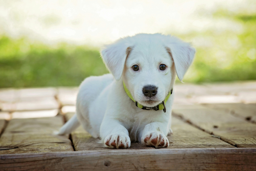

In [ ]:
from fastdownload import download_url
dest = 'dog.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

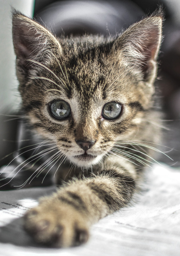

In [ ]:
download_url(search_images('cat photos', max_images=1)[0], 'cat.jpg', show_progress=False)
Image.open('cat.jpg').to_thumb(256,256)

In [ ]:
searches = 'cat', 'dog'
path = Path('dog_or_cat')

for  o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  time.sleep(5)
  resize_image(path/o, max_size=400, dest=path/o)

In [ ]:
doc(vision_learner)

,Type,Default,Details,
dls,,,,
arch,,,,
normalize,bool,True,,
n_out,NoneType,None,,
pretrained,bool,True,,
weights,NoneType,None,,
loss_func,NoneType,None,,
opt_func,function,Adam,,
lr,float,0.001,,
splitter,NoneType,None,,


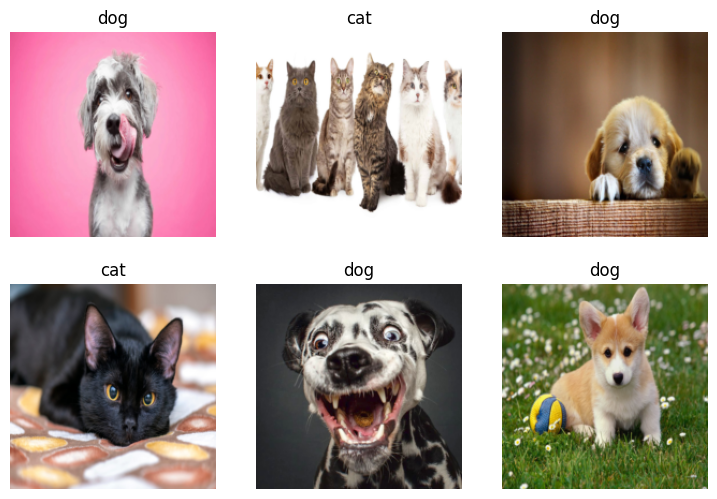

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

14

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 66.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.046899,0.016369,0.000000,01:30


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.081381,0.029834,0.031250,01:47
1,0.069411,0.004489,0.000000,01:27
2,0.055649,0.006635,0.000000,01:30


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in by

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the file again

Saving test2.jpg to test2.jpg


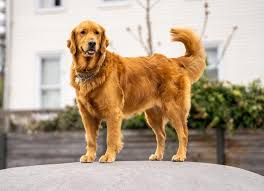

In [ ]:
img = PILImage.create('test2.jpg')
display(img)

In [ ]:
is_cat,_,probs = learn.predict(PILImage.create('test5.jpg'))
print(f"This is a: {is_cat}.")
print(f"Probability it's a dog: {probs[1]:.4f}")
print(f"Probability it's a cat: {probs[0]:.4f}")

This is a: cat.
Probability it's a dog: 0.0188
Probability it's a cat: 0.9812
